# Workplace Module

### Project Title: Analysis of Pices for Vegetables Data


---

## Table of Contents

<a href=#BC> Background</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection </a>

<a href=#three>3. Data Loading </a>

<a href=#four>4. Data Cleaning </a>

<a href=#five>5. Exploratory Data Analysis </a>

<a href=#six>6. Models </a>

<a href=#seven>7. Evaluation </a>

<a href=#eight>8. Conclusion </a>

<a href=#nine>9. References </a>



---
 <a id="BC"></a>
## **Background **
<a href=#cont>Back to Table of Contents</a>

India's agricultural sector, especially its vegetable market, faces significant challenges due to price volatility that impacts farmers, consumers, and the economy. For farmers, fluctuating prices affect profitability and crop decisions, while consumers—particularly low-income households—struggle with rising costs that lead to reduced consumption of essential vegetables. This volatility contributes to food inflation, with vegetables accounting for about 30% of it in fiscal 2024, raising concerns about economic stability amid erratic weather patterns and supply chain inefficiencies. Key drivers include unpredictable weather, inadequate infrastructure like cold storage, seasonal demand spikes, and government policies. 

Through this project we will understand the crucial factors for developing strategies to enhance agricultural sustainability and food security in India, enabling stakeholders to make informed decisions that promote economic welfare and resilience in the agricultural sector.


#### Research Objectives:

1.Identify seasonal patterns in vegetable prices across regions and time periods.

2.Analyze how seasonal trends impact the pricing of different vegetable types.

3.Perform exploratory data analysis to uncover historical trends in vegetable prices.

4.Investigate the cyclical nature of vegetable price variations.

5.Provide actionable insights to support decision-making and improve market efficiency in the agricultural sector.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

Establish the Python environment with essential libraries and tools for the project.
Import and set up all the required Python packages, including those for data manipulation, visualization, and modeling. Key libraries will include:

Pandas: For handling and manipulating datasets efficiently.

NumPy: For numerical computations and working with arrays.

Matplotlib/Seaborn: For data visualization and plotting graphs.

scikit-learn: For building and evaluating machine learning models.

Statsmodels: For statistical modeling and time series analysis.

SciPy: For advanced mathematical and scientific computations.

Jupyter Notebook: As the primary environment for writing and executing code.

By importing these libraries, we will ensure a comprehensive setup to perform data analysis, visualizations, and predictive modeling throughout the project. Additional tools like TensorFlow or PyTorch might be included if deep learning techniques are required.

In [1]:
#Please use code cells to code in and do not forget to comment your code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Objective:** Explain the data collection process and provide a summary of its key features.
* **Overview:** Outline the data sources, methods employed for collection (such as APIs, web scraping, or datasets from public repositories), and give a general description of the dataset. This includes details about its size, scope, and the types of data it contains, such as numerical or categorical variables.
---


### Dataset overview
The dataset used for this analysis was obtained from Kaggle on May 7, 2024. It originates from a reliable source, the Agricultural Marketing Information Network (AGMARKNET), accessible via https://agmarknet.gov.in/.

The dataset provides an extensive overview of vegetable prices across various regions in India, making it a valuable asset for researchers, analysts, and others interested in examining price dynamics. It includes a wide range of vegetables, offering detailed price records over time.

Key attributes of the dataset include vegetable types, price information, and the time periods covered, enabling an in-depth analysis of pricing trends and patterns. Before conducting the analysis, data cleaning and preprocessing steps were applied to ensure the dataset’s quality and accuracy, as outlined in the Data Cleaning section below.

#### Datatypes:

The 'Price Dates' column is of the 'object' datatype.
The vegetable price data is represented in numerical formats.
There are inconsistencies in the datatype for vegetable prices, with some being recorded as 'integer' while others are stored as 'float'.


- The dataset consists of 287 observations rows and 11 features columns


Data Loading 
---

The data for this project is stored in the file prices.csv. It is imported into a Pandas DataFrame, named df, using the pd.read_csv() function. This function reads the CSV file and transforms it into a DataFrame, allowing for further manipulation and analysis.

In [2]:
# loading the dataset
df = pd.read_csv('prices.csv')

# making the copy of dataset 
df_copy = df.copy()

# displaying the firt few rows of the Dataframe
df_copy.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


---
<a href=#four></a>
## Data Cleaning 




#### Renaming Columns

The rename_columns function is designed to standardize column names in a DataFrame following PEP 8 principles, promoting consistency and readability for easier data analysis and visualization. The function defines a dictionary, renamed_columns, which maps each original column name to a standardized version, converting all text to lowercase and replacing spaces with underscores. The .rename() method is then used with this dictionary to update the column names within the DataFrame.


In [3]:
def rename_columns(df):
    """
    Rename columns of a DataFrame according to PEP 8 principles, by converting column names to lowercase and replacing spaces or
        special characters with underscores..

    Args:
        df (pandas.DataFrame): Input DataFrame with columns to be renamed.

    Returns:
        pandas.DataFrame: DataFrame with columns renamed according to PEP 8.
    """
    # dictionary mapping column names to standardised names
    renamed_columns = {
        'Price Dates': 'price_dates',
        'Bhindi (Ladies finger)': 'bhindi',
        'Tomato': 'tomato',
        'Onion': 'onion',
        'Potato': 'potato',
        'Brinjal': 'brinjal',
        'Garlic': 'garlic',
        'Peas': 'peas',
        'Methi': 'methi',
        'Green Chilli': 'green_chilli',
        'Elephant Yam (Suran)': 'elephant_yam'
    }
    return df.rename(columns=renamed_columns)

# Rename columns
df_copy = rename_columns(df_copy)

#### Converting Data Types
The convert_data_types function ensures consistency and accuracy in the DataFrame by converting specific columns to appropriate data types:

It converts columns containing vegetable prices from integers to floats using .astype(float), improving compatibility and enabling smoother numerical operations.

It changes the 'price_dates' column to a datetime format using .to_datetime() with format='%d-%m-%Y' to support precise time-based analysis.

This process enhances data integrity and minimizes potential errors during analysis.

In [4]:
def convert_data_types(df):
    """
    Convert data types of columns within a DataFrame.

    This function converts integer columns to float. 
    Additionally, it standardizes the format of the 'price_dates' column to datetime objects with the format "%d-%m-%Y".

    Args:
        df (pandas.DataFrame): Input DataFrame with columns to be converted.

    Returns:
        pandas.DataFrame: DataFrame with data types converted as specified.
    """
    # Convert integer columns to float
    int_columns = df.select_dtypes(include='int64').columns
    df[int_columns] = df[int_columns].astype(float)
    
    # Convert 'price_dates' column to datetime with correct format
    df['price_dates'] = pd.to_datetime(df['price_dates'], format='%d-%m-%Y')
    
    return df

# Convert data types
df_copy = convert_data_types(df_copy)

#### Checking for Missing Values

The check_missing_values function identifies and reports null values in a DataFrame. It uses .isnull() and .sum() to count nulls in each column and then prints the count alongside the column name, giving a quick overview of missing data.


In [5]:

#Handle missing values
def check_missing_values(df):
    """check for null values in each column of a Dataframe and print the count of null values, 
    along with column-specific null parameters
    """
    print(f'Null values count for each column: ')
    print('---------------------------------------------')

    for col in df.columns:
        null_count = df_copy[col].isnull().sum()
        print(f'{col}: {null_count}')

check_missing_values(df_copy)

Null values count for each column: 
---------------------------------------------
price_dates: 0
bhindi: 0
tomato: 0
onion: 0
potato: 0
brinjal: 0
garlic: 0
peas: 0
methi: 0
green_chilli: 0
elephant_yam: 0




 This result confirms that there are no missing values identified.

#### Check for Duplicate Rows

- The count_dupl_rows function identifies and counts duplicate rows in the dataset using .duplicated().sum(). It helps ensure data quality by detecting and guiding the removal of redundant rows, improving the accuracy of analysis.

In [6]:
# Count the number of duplicate rows in a pandas DataFrame.
def count_dupl_rows(df):
    duplicates = df.duplicated().sum()
    return duplicates

print(f'Number of duplicate rows {count_dupl_rows(df_copy)}')

Number of duplicate rows 0


#### Check for Duplicate Date

It's important to check for duplicate entries in the 'price_dates' column to ensure there is only one price recorded per date.

The count_duplicate_dates function will identify and count any duplicate dates in this column, ensuring the accuracy of time-based analysis.

In [7]:
def count_duplicate_dates(df):
    duplicates = df.duplicated(subset=['price_dates']).sum()
    return duplicates
print(f'The number of duplicate dates: {count_duplicate_dates(df_copy)}')

The number of duplicate dates: 0


#### Identifying Potential Outliers

The check outliers function detects outliers in vegetable prices using descriptive statistics. It calculates the mean, median, standard deviation, and interquartile range (IQR) for each float column. Prices outside the IQR are flagged as potential outliers, and the function returns a DataFrame with the outliers, their count, and key statistics like mean and standard deviation for reference.

In [8]:
# Identify potential outliers in float columns of a DataFrame using descriptive statistics
def check_outliers(df):
    
    outliers = []
    for col in df.select_dtypes(include='float64').columns:
    # Calculate descriptive statistics for the current column
        desc_stats = df[col].describe()
        mean = desc_stats['mean']  # Mean value of the column
        std_dev = desc_stats['std']  # Standard deviation of the column
        q1 = desc_stats['25%']  # First quartile (25th percentile) of the column
        q3 = desc_stats['75%']  # Third quartile (75th percentile) of the column
        iqr = q3 - q1  # Interquartile range (IQR) of the column
        lower_bound = q1 - 1.5 * iqr  # Lower bound for potential outliers
        upper_bound = q3 + 1.5 * iqr  # Upper bound for potential outliers

        # Identify potential outliers in the current column
        potential_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()

        # Calculate the count of outliers
        outlier_count = len(potential_outliers)

        # Create a DataFrame to store the results
        results = pd.DataFrame({
            'Column': [col],
            'Count of Outliers': [outlier_count],
            'Mean': [mean],
            'Standard Deviation': [std_dev],
            'Potential Outliers': [potential_outliers]
        })
        
        # Append the results DataFrame to the list
        outliers.append(results)

    # Concatenate the results DataFrames into a single DataFrame
    outliers_df = pd.concat(outliers, ignore_index=True)
    return outliers_df

# Set the display options to show the entire content of the 'Potential Outliers' column
pd.set_option('display.max_colwidth', None)

# Identify potential outliers
outliers = check_outliers(df_copy)
outliers

,Column,Count of Outliers,Mean,Standard Deviation,Potential Outliers
0,bhindi,7,29.444251,8.124815,"[60.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0]"
1,tomato,1,16.006969,0.118056,[18.0]
2,onion,24,20.649826,11.711204,"[45.0, 57.0, 55.0, 54.0, 54.0, 50.0, 50.0, 47.0, 50.0, 50.0, 47.0, 45.0, 46.0, 46.0, 45.0, 45.0, 46.0, 50.0, 47.0, 46.0, 47.0, 48.0, 46.0, 48.0]"
3,potato,0,18.585366,2.726238,[]
4,brinjal,13,31.655052,11.725421,"[60.0, 70.0, 70.0, 60.0, 60.0, 70.0, 60.0, 70.0, 80.0, 70.0, 70.0, 80.0, 60.0]"
5,garlic,1,133.101045,60.078331,[290.0]
6,peas,5,66.658537,33.302415,"[150.0, 150.0, 150.0, 150.0, 150.0]"
7,methi,10,20.383275,117.428417,"[2000.0, 30.0, 30.0, 35.0, 35.0, 30.0, 30.0, 30.0, 30.0, 30.0]"
8,green_chilli,12,44.122404,12.796590,"[0.13, 80.0, 90.0, 80.0, 90.0, 80.0, 80.0, 75.0, 90.0, 80.0, 80.0, 80.0]"
9,elephant_yam,50,28.797909,6.607973,"[15.0, 15.0, 15.0, 40.0, 12.0, 40.0, 40.0, 40.0, 40.0, 15.0, 15.0, 15.0, 50.0, 15.0, 15.0, 12.0, 12.0, 40.0, 40.0, 50.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 40.0, 50.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]"


#### Results:


Most of the potential outliers are found just above or below the average, suggesting that seasonality might be influencing prices. To investigate this, we'll extract the month from the 'price_date' column and group vegetable prices by month, using a time series plot to visualize the trend in the Exploratory Data Analysis.

However, two extreme outliers likely represent errors:

'Methi' has an unusually high outlier at 2000.0.

'Green Chilli' has an unusually low outlier at 0.13.

These extreme outliers will be corrected by replacing them with the average of the 15 prices before and after each one, accounting for seasonal patterns.

#### Replacing Erroneous Outliers



In [9]:
def replace_erroneous_outliers(df, column, outlier_values):
    """
    Replace outliers in a DataFrame column with the mean of the 30 surrounding observations.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the outliers.
    - column (str): The name of the column with outliers.
    - outlier_values (list): List of outlier values to replace.

    Returns:
    - pandas.DataFrame: The DataFrame with outliers replaced.
    
    Note: Assumes the DataFrame is sorted chronologically.
    """
    for outlier in outlier_values:
        outlier_index = df.index[df[column] == outlier].tolist()[0]
        lower_bound = max(outlier_index - 15, 0)
        upper_bound = min(outlier_index + 15, len(df) - 1)

        # Calculate the mean of the 30 surrounding values
        mean_surrounding = df.loc[lower_bound:upper_bound, column].mean()

        # Replace the outlier
        df.at[outlier_index, column] = mean_surrounding

    return df

# Replace the identified outliers:
df_copy = replace_erroneous_outliers(df_copy, 'methi', [2000.0])
df_copy = replace_erroneous_outliers(df_copy, 'green_chilli', [0.13])


#### Extracting Month to Explore Possible Seasonality

The extract_month function extracts the month from a datetime column and stores it in a new 'price_months' column. Using dt.strftime('%m-%Y'), it formats the date for easier grouping and analysis, helping identify seasonal trends in time-series data.

In [10]:
#Extract month from a datetime column and create a new column to store the month values.

def extract_month(df, date_colummn):

    df['price_months'] = df[date_colummn].dt.strftime('%m-%Y')
        
    return df

    # Extract the month:
df_copy = extract_month(df_copy, 'price_dates')
df_copy.head()

,price_dates,bhindi,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam,price_months
0,2023-01-01,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0,01-2023
1,2023-01-02,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,01-2023
2,2023-01-03,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,01-2023
3,2023-01-04,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0,01-2023
4,2023-01-08,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0,01-2023


## Data Pre-Processing 

#### Data Normalization/Standardization:

- Normalizing or standardizing numeric columns to bring all features into the same scale.

In [11]:
def normalize_columns(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Normalize numeric columns
numeric_columns = ['bhindi', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam']
df_copy = normalize_columns(df_copy, numeric_columns)

In [12]:
df_copy.head()

,price_dates,bhindi,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam,price_months
0,2023-01-01,0.684995,16.911535,0.115490,0.519802,-0.141397,-1.385628,-1.253101,-0.772110,0.059296,-0.57575,01-2023
1,2023-01-02,0.684995,-0.059131,0.115490,0.519802,-0.141397,-1.302258,-1.253101,-0.907725,-0.340374,-0.57575,01-2023
2,2023-01-03,0.684995,-0.059131,0.029953,0.519802,-0.141397,-1.302258,-1.253101,-0.907725,-0.340374,-0.57575,01-2023
3,2023-01-04,0.068521,-0.059131,0.029953,1.254696,-0.568566,-1.302258,-1.253101,-0.907725,-0.340374,-0.57575,01-2023
4,2023-01-08,0.684995,-0.059131,-0.055584,0.887249,-0.568566,-1.302258,-1.343342,-1.043340,-0.740044,-0.57575,01-2023


---
<a href=#five></a>
## Exploratory Data Analysis

---


# 1. Visualize Price Trends for Each Vegetable

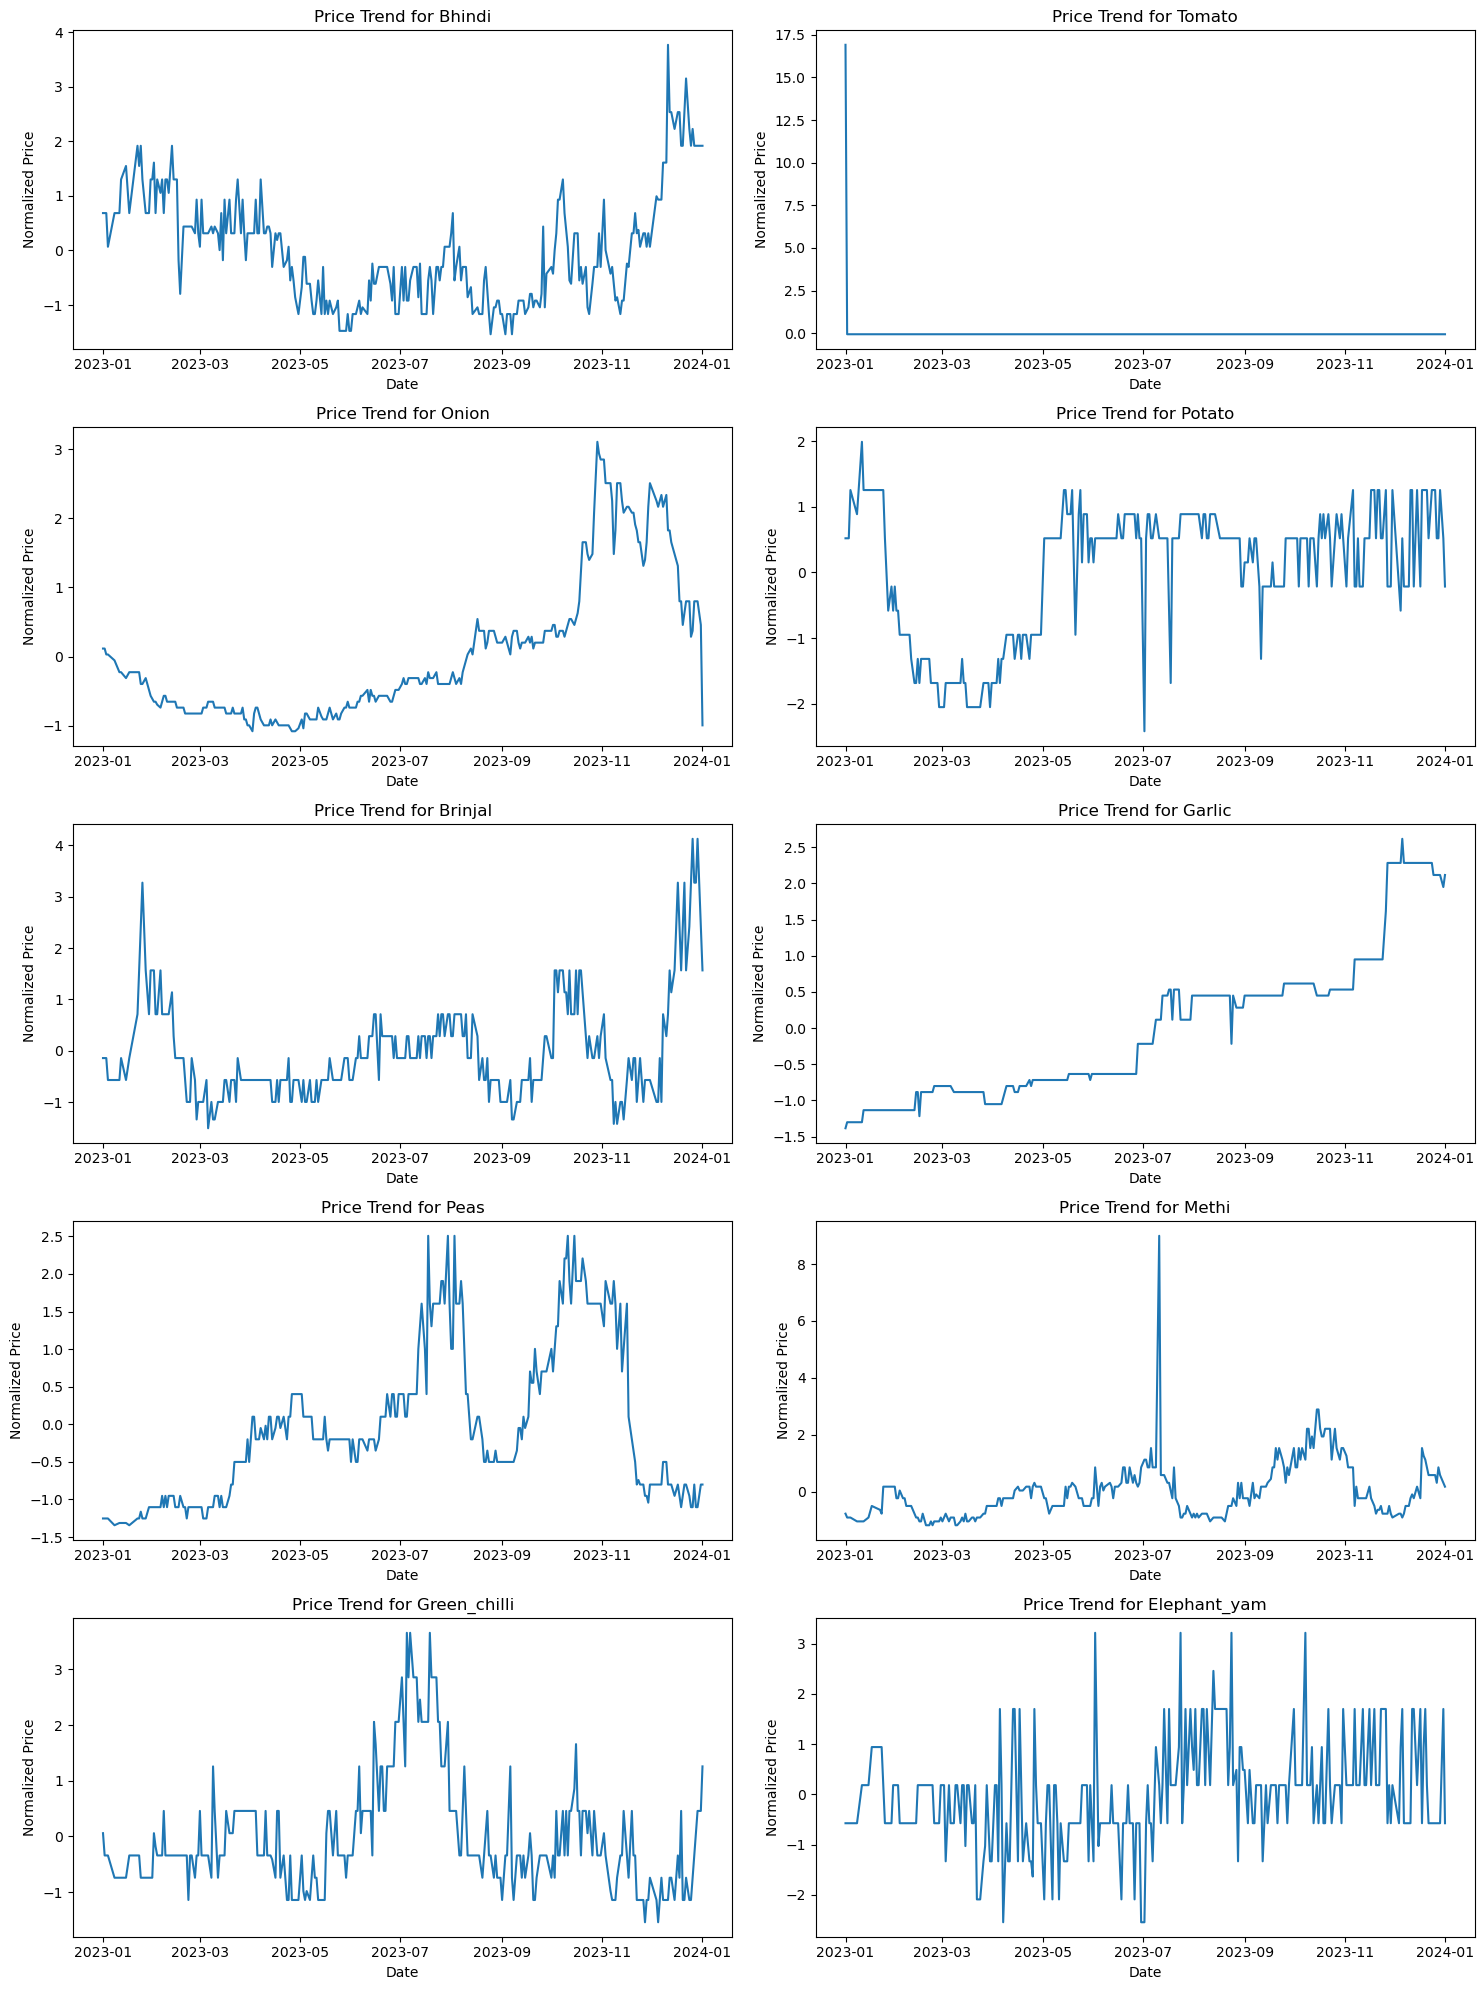

In [13]:

# Create subplots for each vegetable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through each vegetable and plot its price trend
for i, vegetable in enumerate(numeric_columns):
    sns.lineplot(x='price_dates', y=vegetable, data=df_copy, ax=axes[i])
    axes[i].set_title(f'Price Trend for {vegetable.capitalize()}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Normalized Price')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


Creates line plots to visualize the price trends of each vegetable over time.

Uses normalized prices for better comparison across vegetables.

# 2. Visualize Price Trends by Month for Each Vegetable

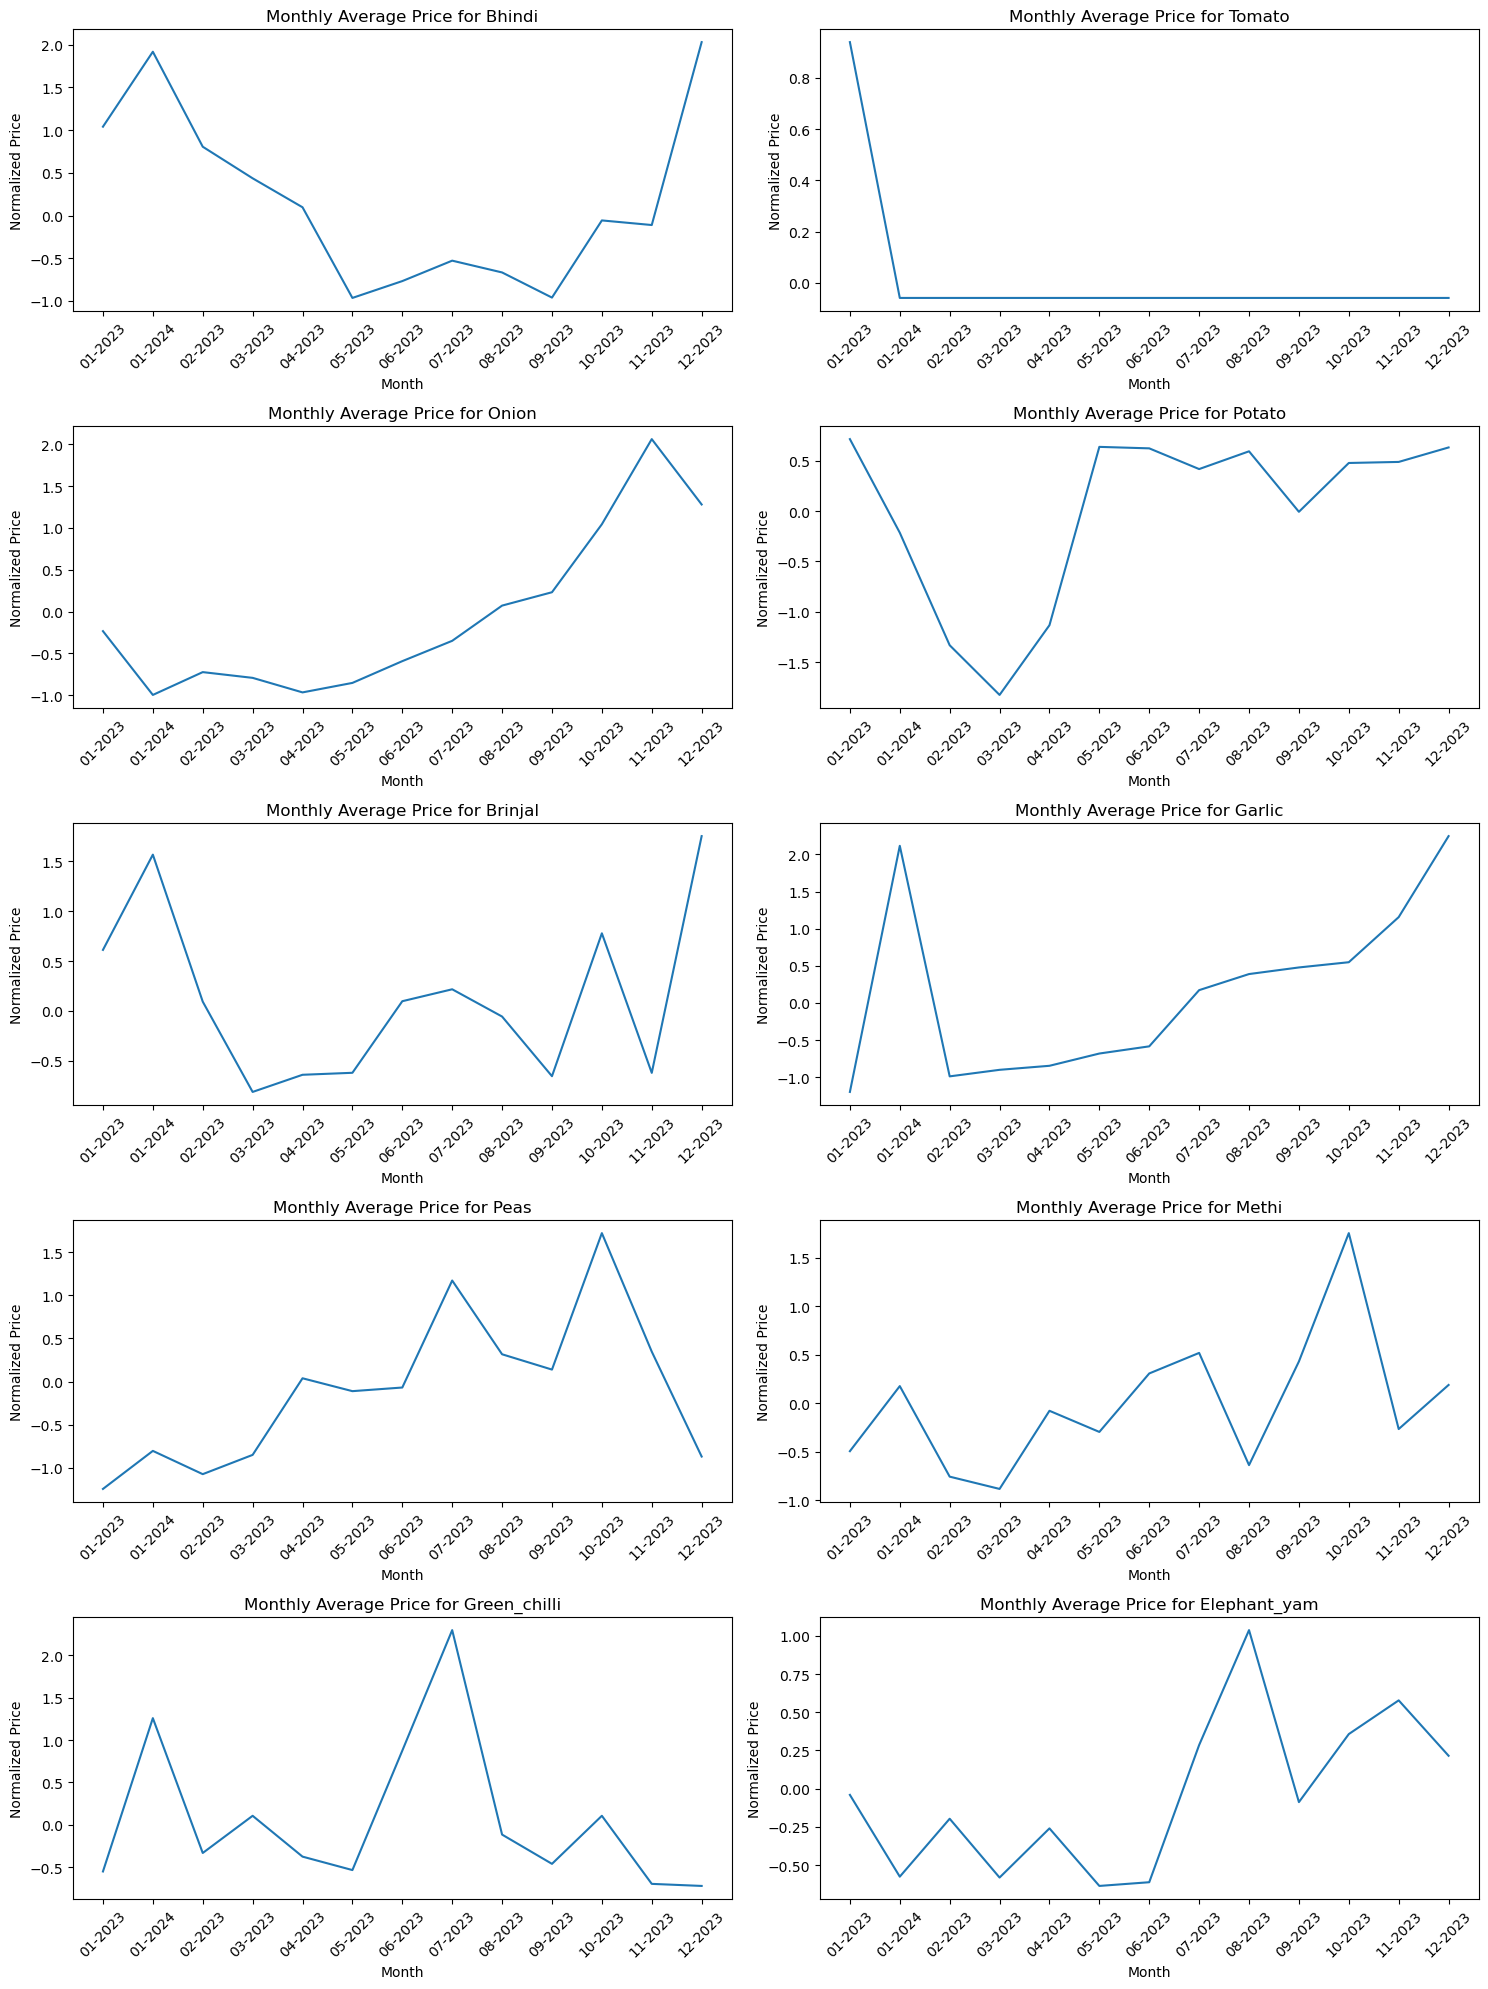

In [14]:

# Create subplots for each vegetable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Iterate through each vegetable and plot its price trend by month
for i, vegetable in enumerate(numeric_columns):
    monthly_avg = df_copy.groupby('price_months')[vegetable].mean().reset_index()
    sns.lineplot(x='price_months', y=vegetable, data=monthly_avg, ax=axes[i])
    axes[i].set_title(f'Monthly Average Price for {vegetable.capitalize()}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Normalized Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


Calculates and plots the monthly average price for each vegetable.

Helps identify seasonal patterns in price fluctuations.

# 3. Visualize Price Distribution for Each Vegetable

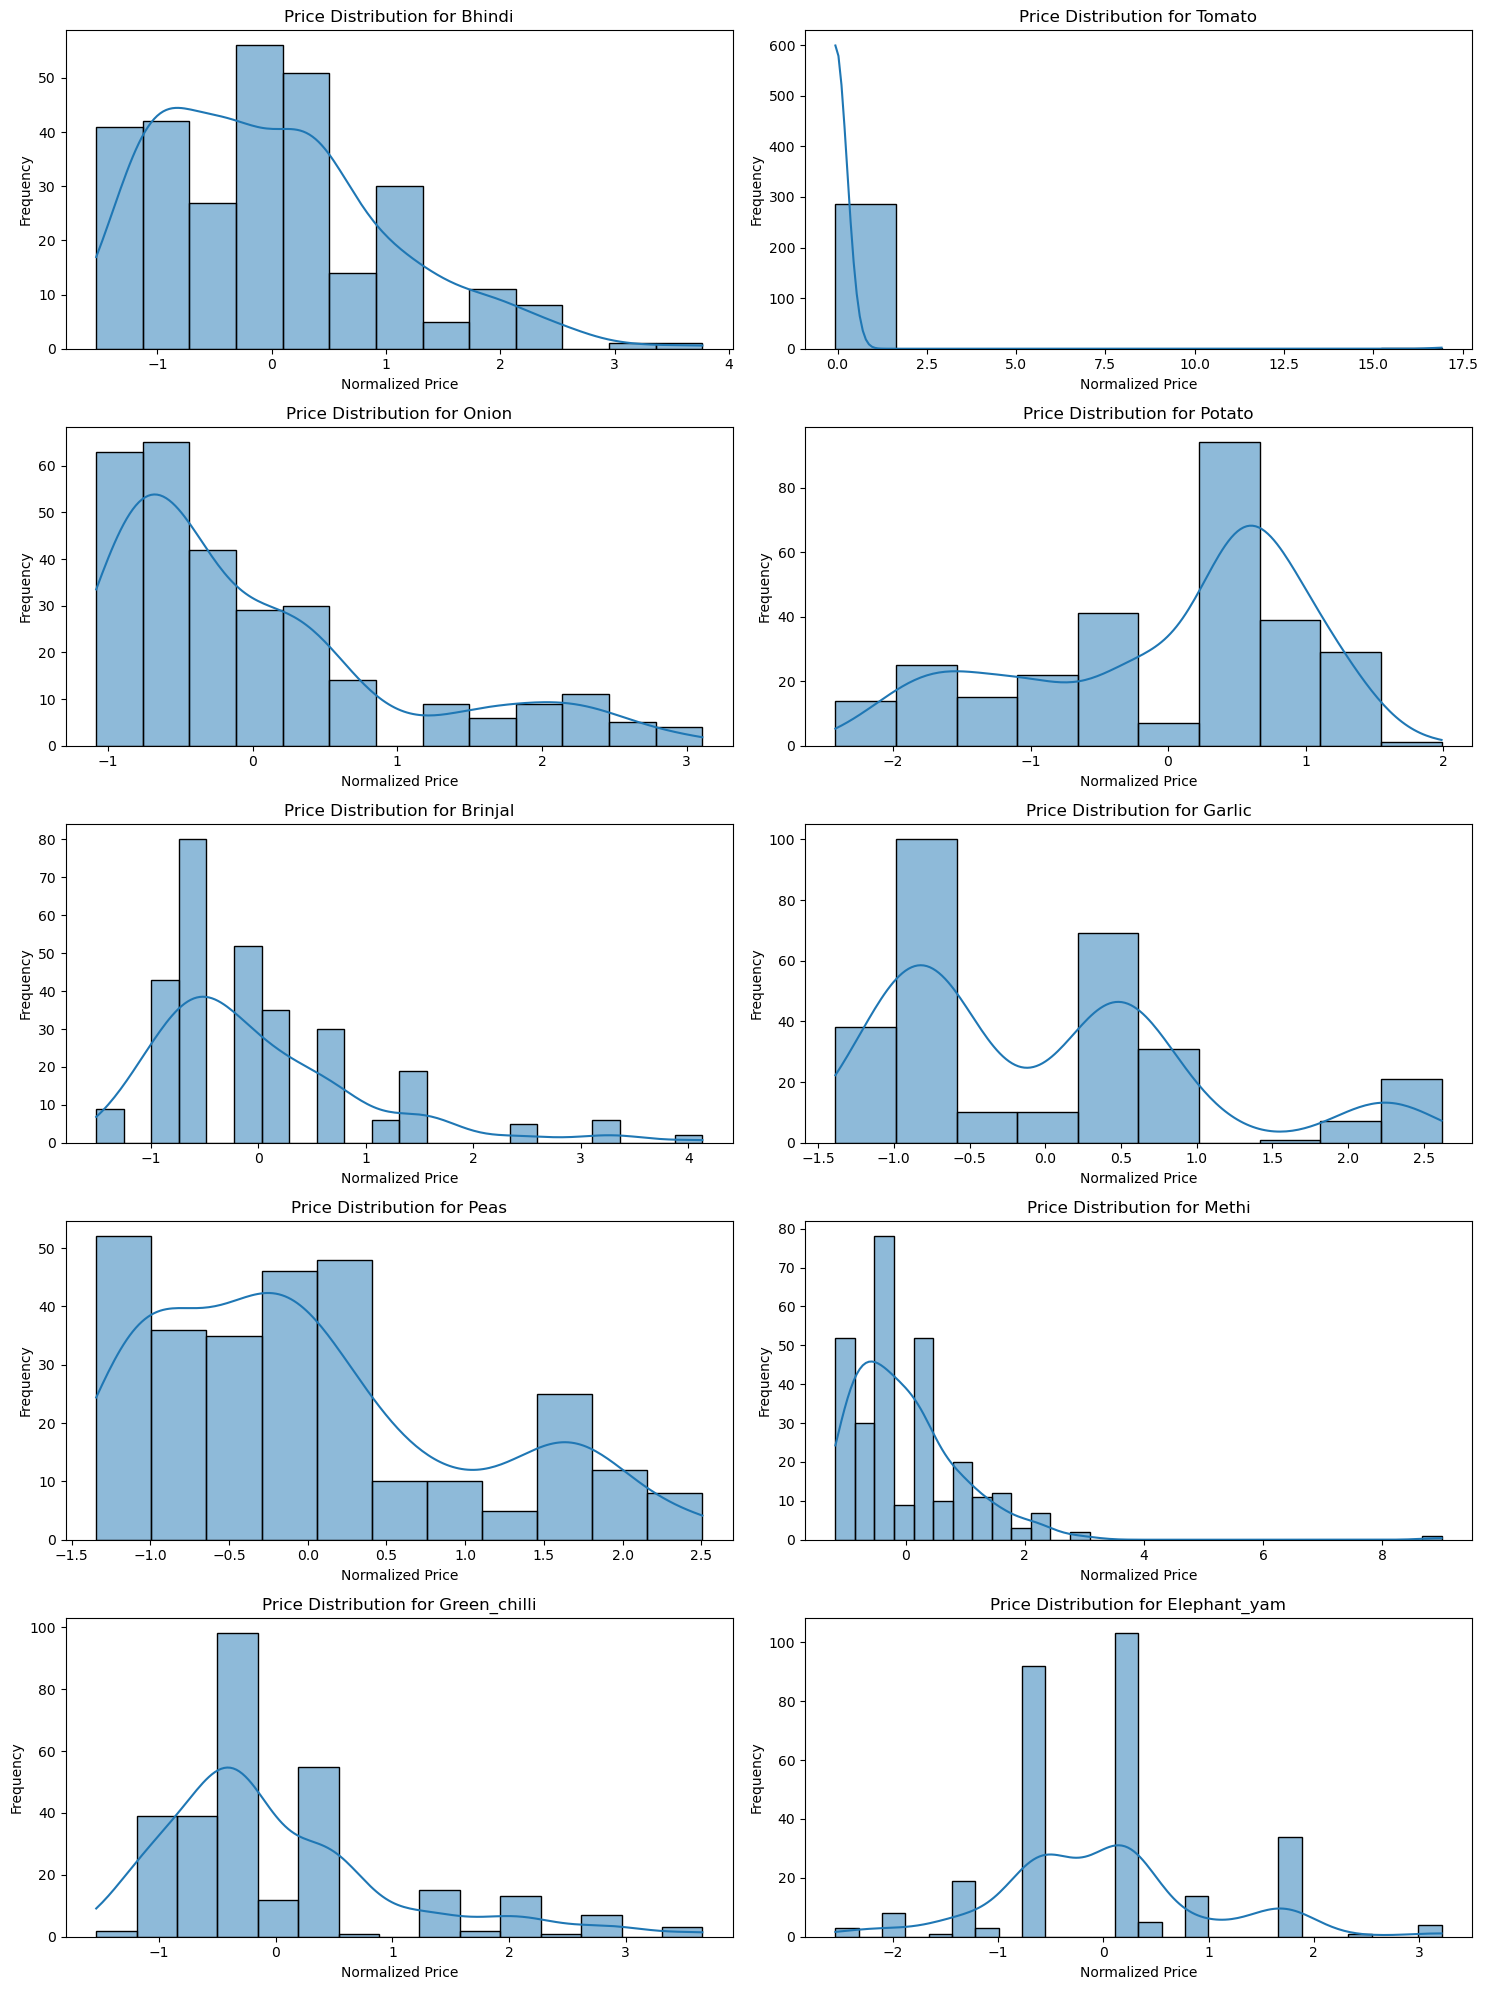

In [15]:

# Create subplots for each vegetable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Iterate through each vegetable and plot its price distribution
for i, vegetable in enumerate(numeric_columns):
    sns.histplot(df_copy[vegetable], kde=True, ax=axes[i])
    axes[i].set_title(f'Price Distribution for {vegetable.capitalize()}')
    axes[i].set_xlabel('Normalized Price')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Creates histograms with kernel density estimates (KDE) to visualize the distribution of prices for each vegetable.

Provides insights into the range, central tendency, and skewness of price distributions.

# 4. Correlation Heatmap

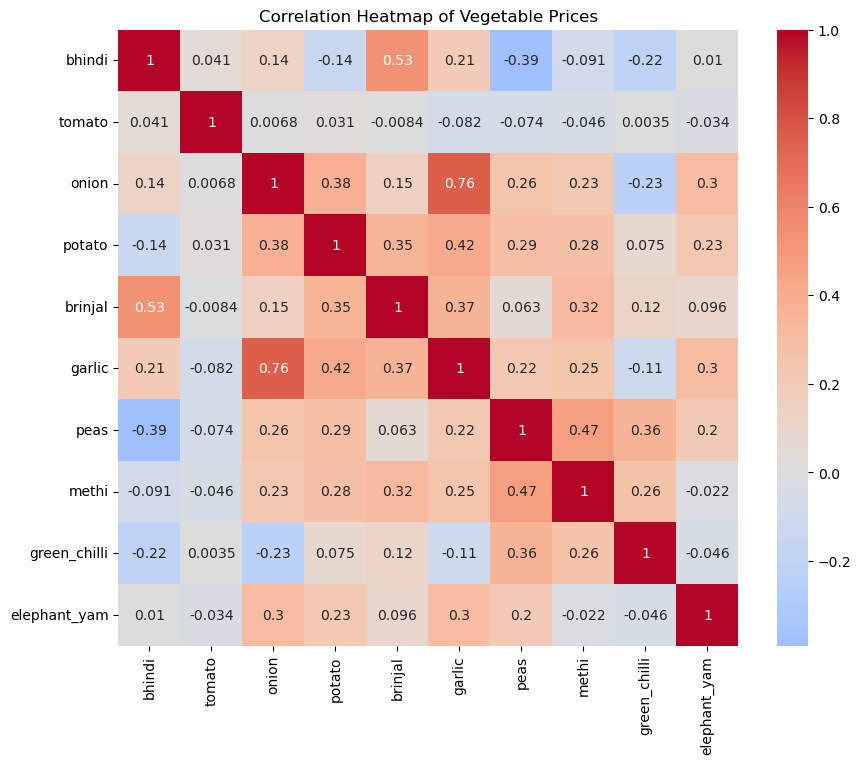

In [16]:


# Calculate the correlation matrix
correlation_matrix = df_copy[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Vegetable Prices')
plt.show()

Calculates and visualizes the correlation matrix between different vegetable prices.

Helps identify potential relationships and dependencies between vegetable prices.

---
<a href=#six></a>
## **Modeling**

---


---
<a href=#seven></a>
## **Evaluation and Validation**

---

---
<a href=#eight></a>
## **Conclusion**


---
